# Instance Segmentation Demo: Semantic NMS Concept
This notebook mocks a basic instance segmentation scenario with bounding boxes and applies a Semantic NMS-like concept.
Detail comes in this [essay](https://ccomkhj.github.io/posts/2025/02/10/BeyondmAP/)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random

## 1. Generate Mock Predictions

In [20]:
# Mock data for predictions and semantic masks
def generate_mock_data(num_predictions=30, image_size=(300, 300)):
    predictions = []
    for _ in range(num_predictions):
        x_min = random.randint(0, image_size[0] // 2)
        y_min = random.randint(0, image_size[1] // 2)
        x_max = x_min + random.randint(20, 100)
        y_max = y_min + random.randint(20, 100)
        score = random.uniform(0.2, 0.9)
        category = random.randint(0, 4)  # Mock categories from 0 to 4
        mask = np.zeros(image_size, dtype=bool)
        mask[y_min:y_max, x_min:x_max] = True
        predictions.append({"mask": mask, "score": score, "category": category})

    semantic_mask = np.random.randint(
        0, 5, size=image_size
    )  # Mock semantic segmentation
    return predictions, semantic_mask


predictions, semantic_mask = generate_mock_data()

## 2. Semantic NMS-like Filtering

In [21]:
def semantic_nms(predictions, semantic_mask, threshold=0.1):
    filtered = []
    occupied = np.zeros_like(semantic_mask, dtype=bool)
    sorted_preds = sorted(predictions, key=lambda x: x["score"], reverse=True)

    for pred in sorted_preds:
        mask = pred["mask"]
        category = pred["category"]
        semantic_overlap = (semantic_mask == category) & mask
        if np.sum(semantic_overlap) / np.sum(mask) < threshold:
            continue
        if np.any(occupied & mask):
            continue
        occupied |= mask
        filtered.append(pred)

    return filtered


filtered_predictions = semantic_nms(predictions, semantic_mask)

## 3. Visualization

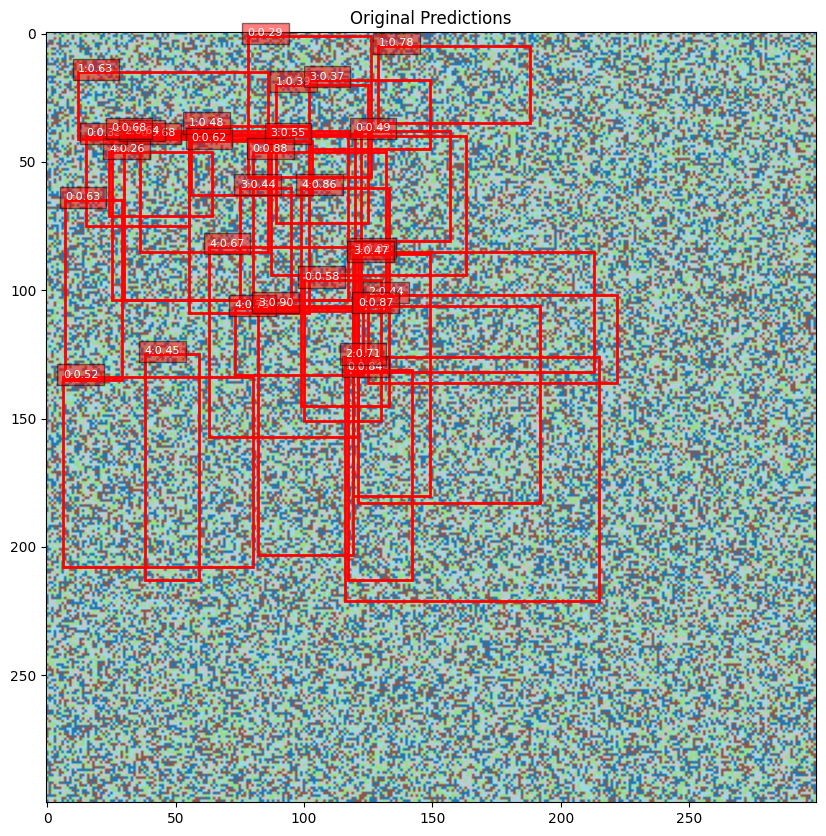

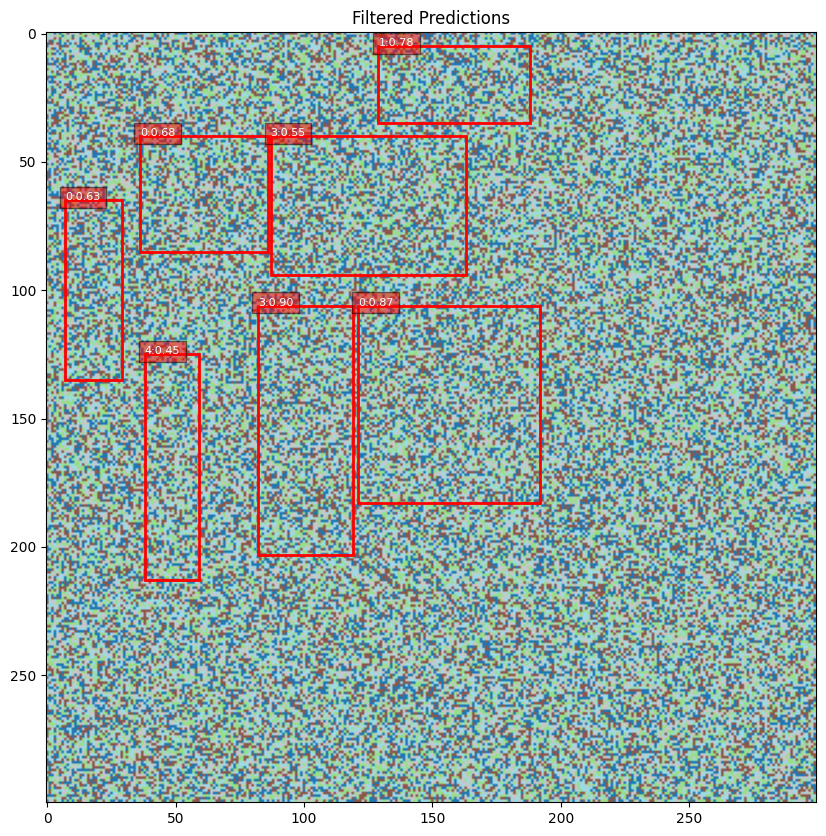

In [22]:
def plot_predictions(image_size, predictions, semantic_mask, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(semantic_mask, cmap="tab20")
    plt.title(title)
    ax = plt.gca()
    for pred in predictions:
        mask = pred["mask"]
        category = pred["category"]
        score = pred["score"]
        y, x = np.where(mask)
        x_min, x_max = x.min(), x.max()
        y_min, y_max = y.min(), y.max()
        rect = plt.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            fill=False,
            edgecolor="red",
            linewidth=2,
        )
        ax.add_patch(rect)
        plt.text(
            x_min,
            y_min,
            f"{category}:{score:.2f}",
            color="white",
            fontsize=8,
            bbox=dict(facecolor="red", alpha=0.5),
        )
    plt.show()


# Original predictions
plot_predictions(
    semantic_mask.shape, predictions, semantic_mask, "Original Predictions"
)
# Filtered predictions after Semantic NMS
plot_predictions(
    semantic_mask.shape, filtered_predictions, semantic_mask, "Filtered Predictions"
)